In [1]:
election <- read.csv("../Data/election_2022.csv", stringsAsFactors = F)
head(election)
library(dplyr)
library(plotrix)
library(stringr)
options(scipen = 100)
par(family = "AppleGothic")
options(warn = -1)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [12]:
a <- aggregate(cbind(투표수,이재명, 윤석열, 심상정)~광역시도,election,sum)

In [17]:
강원권 <- c("강원도")
수도권 <- c("경기도","서울특별시","인천광역시")
영남권 <- c("경상북도","경상남도","부산광역시","대구광역시","울산광역시")
호남권 <- c("광주광역시","대전광역시","전라남도","전라북도")
충청권 <- c("세종특별자치시","충청남도","충청북도")

In [24]:
a <- election[is.element(election[,1],영남권),]
영남권 <- c(sum(a$이재명) / sum(a$투표수) * 100,
sum(a$윤석열) / sum(a$투표수) * 100,
sum(a$심상정) / sum(a$투표수) * 100)

In [25]:
a <- election[is.element(election[,1],강원권),]
강원권 <- c(sum(a$이재명) / sum(a$투표수) * 100,
sum(a$윤석열) / sum(a$투표수) * 100,
sum(a$심상정) / sum(a$투표수) * 100)

In [26]:
a <- election[is.element(election[,1],수도권),]
수도권 <- c(sum(a$이재명) / sum(a$투표수) * 100,
sum(a$윤석열) / sum(a$투표수) * 100,
sum(a$심상정) / sum(a$투표수) * 100)

In [27]:
a <- election[is.element(election[,1],호남권),]
호남권 <- c(sum(a$이재명) / sum(a$투표수) * 100,
sum(a$윤석열) / sum(a$투표수) * 100,
sum(a$심상정) / sum(a$투표수) * 100)

In [28]:
a <- election[is.element(election[,1],충청권),]
충청권 <- c(sum(a$이재명) / sum(a$투표수) * 100,
sum(a$윤석열) / sum(a$투표수) * 100,
sum(a$심상정) / sum(a$투표수) * 100)

In [32]:
result <- cbind(호남권,영남권,수도권,강원권,충청권)
rownames(result) <- c("이재명","윤석열","심상정")

In [36]:
result <- t(result)

In [46]:
rownames(result)

[1] "호남권" "영남권" "수도권" "강원권" "충청권"

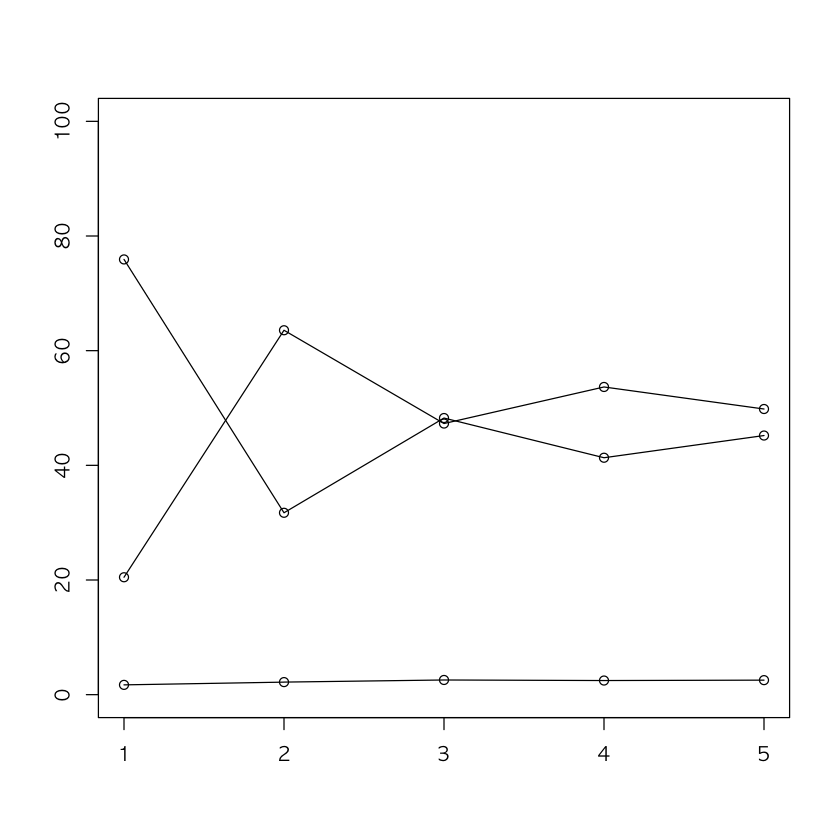

In [53]:
par(family = "AppleGothic")
plot(result[,1],
    type = "o",
     ylim = c(0,100),
     ann = F
    )
lines(result[,2],type="o")
lines(result[,3],type="o")
